# Setup

In [4]:
!pip install matplotlib seaborn pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('StressLevelDataset.csv')
print(f"Loaded successfully! Shape: {df.shape}")
df.head()

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 5.5 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.1 MB 4.4 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.1 MB 4.2 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 4.0 MB/s eta 0:00:02
   --------------------- ------------------ 4.5/8.1 MB 4.4 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 5.1 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   -------------------------------- ------- 1.8/2.3 MB 10.8 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 9.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------- ---------------------


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Loaded successfully! Shape: (1100, 21)


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


# Introduction of Problem

The questions I want to answer: Are high achievers necessarily more stressed? 
Is there a trade-off between academic success and mental wellbeing, or do some students manage both effectively?

Does academic pressure create a continuous cycle? 
Do students with higher study loads experience more stress, which then hurts their academic performance, creating even more pressure to do better and it then snowballs?

# Introduction of Data

This data was found on Kaggle: https://www.kaggle.com/code/mdsultanulislamovi/comprehensive-analysis-student-stress-datasets/input?select=StressLevelDataset.csv
It's a survey with 1100 particpants with all being students in a nationwide survey measuring numerous factors such as anxiety level, self esteem, mental health history, depression, sleep quality, and living conditions. 

# Pre-processing the data

In [6]:
print("=== PREPROCESSING ASSESSMENT ===")

print("1. Missing Values Check:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ No missing values found")
else:
    print(missing[missing > 0])

print("\n2. Duplicate Records:")
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
if duplicates > 0:
    print("First few duplicates:")
    print(df[df.duplicated()].head())

print("\n3. Data Types:")
print(df.dtypes)
print(f"\nAll numeric: {df.dtypes.apply(lambda x: x in ['int64', 'float64']).all()}")

print("\n4. Value Ranges (checking for unrealistic values):")
for col in df.columns:
    print(f"{col}: {df[col].min()} to {df[col].max()} (unique values: {df[col].nunique()})")

print("\n5. Outlier Detection (IQR method for key variables):")
key_vars = ['anxiety_level', 'self_esteem', 'depression', 'academic_performance', 'study_load', 'sleep_quality']
outlier_summary = {}
for col in key_vars:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)
    print(f"{col}: {len(outliers)} outliers (bounds: {lower_bound:.1f} - {upper_bound:.1f})")

print("\n6. Distribution Balance Check:")
print("Stress level distribution:")
stress_counts = df['stress_level'].value_counts().sort_index()
for level, count in stress_counts.items():
    pct = (count/len(df))*100
    print(f"Level {level}: {count} ({pct:.1f}%)")

=== PREPROCESSING ASSESSMENT ===
1. Missing Values Check:
✓ No missing values found

2. Duplicate Records:
Duplicate rows: 0

3. Data Types:
anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object

All numeric: True

4. Value Ranges (checking f

# Data Preprocessing

The StressLevelDataset.csv was already very clean:
- ✓ No missing values across all 1,100 records
- ✓ No duplicate records 
- ✓ All variables are integers with realistic ranges
- ✓ Balanced target variable: Low stress (33.9%), Medium (32.5%), High (33.5%)

Since the data was already high-quality, minimal preprocessing was needed. I retained all data points, including statistical outliers, because extreme values in psychological data often represent genuine student experiences rather than data errors.


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.5 MB ? eta -:--:--
    --------------------------------------- 0.8/38.5 MB 2.5 MB/s eta 0:00:16
   - -------------------------------------- 1.3/38.5 MB 2.5 MB/s eta 0:00:15
   -- ------------------------------------- 2.1/38.5 MB 2.9 MB/s eta 0:00:13
   --- ------------------------------------ 3.1/38.5 MB 3.5 MB/s eta 0:00:11
   ---- ----------------------------------- 4.7/38.5 MB 4.2 MB/s eta 0:00:09
   ----- ---------------------------------- 5.5/38.5 MB 4.0 MB/s eta 0:00:09
   ------ --------------------------------- 6.3/38.5 MB 4.0 MB/s eta 0:00:09
   ------- -------------------------------- 7.1/38.5 MB 4.2 MB/s eta 0:00:08
   -------- ------------------------------- 7.9/38.5 MB 4.1 MB/s eta 0:00:08
   ---------- ----------------------------- 9.7/38.5 MB 4.5 MB/s eta 0:00:07
   ------------ --------------------------- 12.1/38.5 MB 5.1 MB/s eta 0:00:06
   ---------

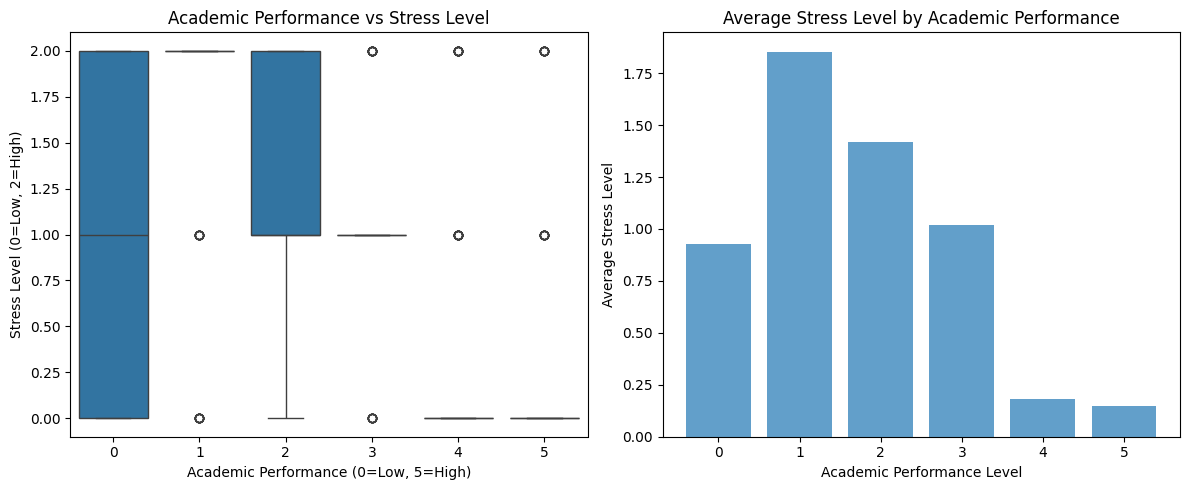


KEY INSIGHT:
High performers (level 4-5): 370 students
  • Low stress: 329 students (88.9%)
  • Medium stress: 21 students (5.7%)
  • High stress: 20 students (5.4%)


In [9]:
# Install scipy
!pip install scipy

# Then run this simplified version without scipy first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("=== QUESTION 1: Are high achievers necessarily more stressed? ===")

# Simple correlation without scipy
correlation = df['academic_performance'].corr(df['stress_level'])
print(f"Correlation between Academic Performance and Stress: {correlation:.3f}")

# Basic visualization - Academic Performance vs Stress
plt.figure(figsize=(12, 5))

# Plot 1: Box plot
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='academic_performance', y='stress_level')
plt.title('Academic Performance vs Stress Level')
plt.xlabel('Academic Performance (0=Low, 5=High)')
plt.ylabel('Stress Level (0=Low, 2=High)')

# Plot 2: Average stress by performance
plt.subplot(1, 2, 2)
stress_by_performance = df.groupby('academic_performance')['stress_level'].mean()
plt.bar(stress_by_performance.index, stress_by_performance.values, alpha=0.7)
plt.title('Average Stress Level by Academic Performance')
plt.xlabel('Academic Performance Level')
plt.ylabel('Average Stress Level')

plt.tight_layout()
plt.show()

# Show the key numbers
print("\nKEY INSIGHT:")
high_performers = df[df['academic_performance'] >= 4]
print(f"High performers (level 4-5): {len(high_performers)} students")
for level in [0, 1, 2]:
    count = (high_performers['stress_level'] == level).sum()
    pct = (count / len(high_performers)) * 100 if len(high_performers) > 0 else 0
    stress_name = ['Low', 'Medium', 'High'][level]
    print(f"  • {stress_name} stress: {count} students ({pct:.1f}%)")

-- Takeaways: So to answer my question of whether high performing students are more stressed, the answer, to my surpise, is NO. Actually, what we see from the charts is that, generally, higher performing students actually tend to have lower stress levels compared to their lower performing peers who are moderately to extremely stressed. Now, stress can be caused from an extreme multitude of things. It's not just academic stress itself. If it was..that would make this analysis a lot simpler and easier. What is clear though, is that high stress equates to low academic performance. Although, there are some outliers correlating high-performance with high-stress levels. To answer the question of if some students can manage both effectively, that does seem to be the majority case rather than just "some" students. 

The "Success Breeds Confidence" Phenomenon
Rather than finding evidence of a vicious cycle where academic pressure creates stress that hurts performance, I discovered what appears to be a virtuous cycle: higher academic performance correlates with lower stress levels, suggesting that academic success may actually be protective against stress.

The most interesting insight is that students in the middle-to-low performance range experience the highest stress. This suggests that stress may be more closely linked to:

Academic uncertainty and struggle
Fear of failure rather than pressure to succeed
Lack of confidence in academic abilities
The frustration of not meeting personal or external expectations

High-performing students, conversely, may experience a protective confidence effect where academic success reduces rather than increases stress levels.

-- Personal/additional statement: Having experienced the full range of stress levels with performance levels, I can definitely see why higher performers have lower stress. Considering the academic scope of this survey and dataset, having bad grades AND being stressed is the worst peak. So, students may be very stressed, however, as long as their doing well in class then life is good as well. 

-- Impact
Potential Positive Impacts: 

Reducing Achievement Stigma: The findings could help destigmatize academic excellence by showing that high performance doesn't necessarily come with a mental health cost, potentially encouraging students to pursue their academic goals without fear of inevitable stress.

Potential Negative Impacts: 

Oversimplification Risk: These findings might be misinterpreted to suggest that struggling students are simply "not trying hard enough" or that academic pressure is never a concern. This could lead to reduced empathy for students experiencing genuine academic stress.

Individual Variation Ignored: By focusing on group averages, this analysis might overlook individual high achievers who do experience significant stress, potentially making them feel unseen or invalidated.